<a href="https://colab.research.google.com/github/Tejasri-Pendota/FacceMask--detection/blob/main/Face_Mast_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle  #making a directory called .kaggle
!cp kaggle.json ~/.kaggle/ # copying kaggle.json into the directory .kaggle
!chmod 600 ~/.kaggle/kaggle.json # is used to change the permissions of the kaggle.json file.

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset #API command to download dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 161M/163M [00:12<00:00, 15.1MB/s]
100% 163M/163M [00:12<00:00, 14.1MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset , "r") as zip:
  zip.extractall()
  print("Dataset is extracted")

Dataset is extracted


In [ ]:
!ls
#directories

data  face-mask-dataset.zip  sample_data


In [ ]:
import os
#The os module includes a wide range of functions for file and directory manipulation,
#process management, environment variable handling, and more
import numpy as np # we'll convert theses images into numy arrays
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow #will show an image in a seperate window
from PIL import Image # image processing lib to do some opertaions on image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
# creat a list which contains all the file names in with mask folder

print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2359.jpg', 'with_mask_2950.jpg', 'with_mask_1987.jpg', 'with_mask_3587.jpg', 'with_mask_3254.jpg']
['with_mask_2487.jpg', 'with_mask_3055.jpg', 'with_mask_1659.jpg', 'with_mask_3315.jpg', 'with_mask_1965.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
# creat a list which contains all the file names in without mask folder

print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2554.jpg', 'without_mask_3232.jpg', 'without_mask_1057.jpg', 'without_mask_1772.jpg', 'without_mask_2280.jpg']
['without_mask_3674.jpg', 'without_mask_1294.jpg', 'without_mask_772.jpg', 'without_mask_719.jpg', 'without_mask_288.jpg']


In [ ]:
print("No. of with mask images",len(with_mask_files))
print("No. of without mask images",len(without_mask_files))
#almost equal no imbalance

No. of with mask images 3725
No. of without mask images 3828


In [ ]:
# creating the lables

with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)


with mask --> 0
without mask --> 1

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels
 # not a numpy array to undergo addition , here they are list , it will bwcome a superlist

In [ ]:
print(labels[0:5])
print(labels[-5:])
print(len(labels))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
7553


Displayibg the images

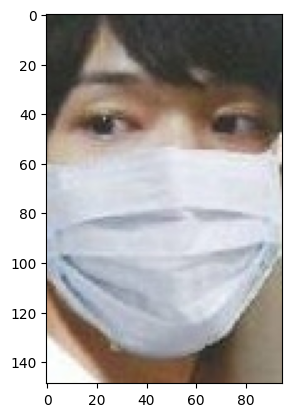

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_125.jpg')# reads image in the form of numpy array
imgplot = plt.imshow(img)
plt.show()

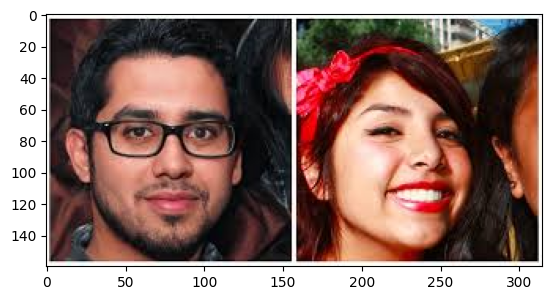

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_1670.jpg')
plt.imshow(img)
plt.show()
#Even though images and plots might appear without explicitly calling plt.show(),
# it is still a good practice to include it to ensure that all figures are rendered properly and to maintain consistency.
#It can also help in controlling when and how figures are displayed, especially when dealing with multiple plots or complex visualizations.


Resize images
convert images ti numpy arrays

In [ ]:
with_mask_path = '/content/data/with_mask/'

data=[] #empty list

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file) # eg. /content/data/with_mask/ + with_mask_106.jpg
  #reading images , concatinate
  image = image.resize((128,128))
  image = image.convert('RGB') # some r in the form of black and white, just coverting all of them to RGB
  image = np.array(image)
  data.append(image)


  without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB') # some r in the form of black and white, just coverting all of them to RGB
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[173, 208, 238],
        [172, 207, 237],
        [171, 206, 236],
        ...,
        [146, 187, 222],
        [159, 198, 230],
        [167, 205, 233]],

       [[174, 210, 239],
        [173, 209, 239],
        [172, 208, 238],
        ...,
        [146, 189, 224],
        [163, 201, 234],
        [169, 205, 234]],

       [[176, 213, 242],
        [175, 212, 241],
        [173, 211, 240],
        ...,
        [150, 193, 229],
        [166, 206, 240],
        [170, 208, 237]]], dtype=uint8)
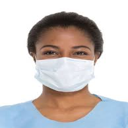

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape #RGB

(128, 128, 3)

In [ ]:
#converting list to numpy array
X=np.array(data)
Y=np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
X.shape

(7553, 128, 128, 3)

In [ ]:
Y.shape

(7553,)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[173, 208, 238],
        [172, 207, 237],
        [171, 206, 236],
        ...,
        [146, 187, 222],
        [159, 198, 230],
        [167, 205, 233]],

       [[174, 210, 239],
        [173, 209, 239],
        [172, 208, 238],
        ...,
        [146, 189, 224],
        [163, 201, 234],
        [169, 205, 234]],

       [[176, 213, 242],
        [175, 212, 241],
        [173, 211, 240],
        ...,
        [150, 193, 229],
        [166, 206, 240],
        [170, 208, 237]]], dtype=uint8)
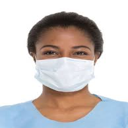

In [ ]:
data[0]

In [ ]:
X_train , X_test ,Y_train ,Y_test = train_test_split(X , Y ,test_size=0.2,random_state =2)

In [ ]:
print(X_train.shape , X_test.shape ,Y_train.shape ,Y_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3) (6042,) (1511,)


In [ ]:
#scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[227, 231, 234],
        [228, 232, 235],
        [227, 232, 235],
        ...,
        [233, 237, 240],
        [234, 236, 240],
        [235, 236, 240]],

       [[228, 232, 235],
        [228, 232, 235],
        [227, 232, 235],
        ...,
        [233, 237, 240],
        [234, 236, 240],
        [235, 236, 240]],

       [[228, 232, 235],
        [228, 232, 235],
        [228, 232, 235],
        ...,
        [234, 236, 240],
        [235, 236, 240],
        [235, 236, 240]],

       ...,

       [[143, 147, 159],
        [143, 147, 159],
        [140, 146, 158],
        ...,
        [152, 157, 166],
        [154, 157, 166],
        [154, 157, 166]],

       [[141, 146, 158],
        [140, 145, 157],
        [137, 143, 155],
        ...,
        [151, 156, 165],
        [151, 155, 164],
        [151, 154, 163]],

       [[138, 145, 157],
        [138, 144, 156],
        [137, 143, 155],
        ...,
        [150, 153, 162],
        [149, 153, 162],
        [149, 153, 162]]], dtype=uint8)
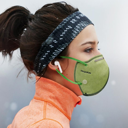

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.89019608, 0.90588235, 0.91764706],
        [0.89411765, 0.90980392, 0.92156863],
        [0.89019608, 0.90980392, 0.92156863],
        ...,
        [0.91372549, 0.92941176, 0.94117647],
        [0.91764706, 0.9254902 , 0.94117647],
        [0.92156863, 0.9254902 , 0.94117647]],

       [[0.89411765, 0.90980392, 0.92156863],
        [0.89411765, 0.90980392, 0.92156863],
        [0.89019608, 0.90980392, 0.92156863],
        ...,
        [0.91372549, 0.92941176, 0.94117647],
        [0.91764706, 0.9254902 , 0.94117647],
        [0.92156863, 0.9254902 , 0.94117647]],

       [[0.89411765, 0.90980392, 0.92156863],
        [0.89411765, 0.90980392, 0.92156863],
        [0.89411765, 0.90980392, 0.92156863],
        ...,
        [0.91764706, 0.9254902 , 0.94117647],
        [0.92156863, 0.9254902 , 0.94117647],
        [0.92156863, 0.9254902 , 0.94117647]],

       ...,

       [[0.56078431, 0.57647059, 0.62352941],
        [0.56078431, 0.57647059, 0.62352941],
        [0.54901961, 0

**Building neural network**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes =2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))#turning og some neuron to avoid overfitting
#Dropout randomly "drops out" (sets to zero) a fraction of the neurons in the layer to which it is applied.
#In this case, 0.5 means that 50% of the neurons are dropped during each training step.
model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile the NN

model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics=['acc'])
#Accuracy measures the percentage of correctly predicted labels out of all predictions.

In [ ]:
#training the NN

history = model.fit(X_train_scaled, Y_train , validation_split=0.1 , epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - acc: 0.6882 - loss: 3.0762 - val_acc: 0.8876 - val_loss: 0.3006
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.8916 - loss: 0.2765 - val_acc: 0.8942 - val_loss: 0.2956
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.9112 - loss: 0.2334 - val_acc: 0.9124 - val_loss: 0.2585
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.9237 - loss: 0.1824 - val_acc: 0.9190 - val_loss: 0.2442
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.9404 - loss: 0.1401 - val_acc: 0.9240 - val_loss: 0.2610


In [ ]:
loss , accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test acuuracy:",accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.9170 - loss: 0.2039
Test acuuracy: 0.9252150654792786


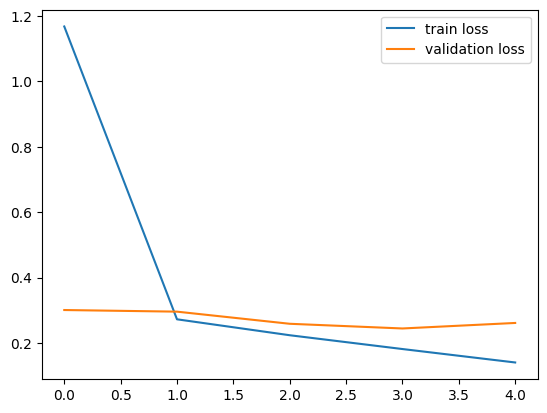

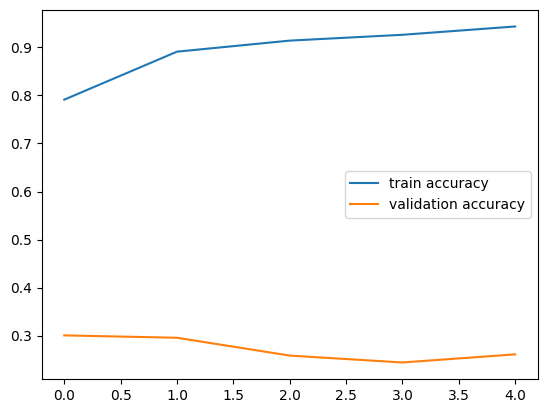

In [ ]:
h= history


#Plot the loss value

plt.plot(h.history['loss'],label = 'train loss')
plt.plot(h.history['val_loss'],label = 'validation loss')
plt.legend()
plt.show()

#Plot the accuracy value

plt.plot(h.history['acc'],label = 'train accuracy')
plt.plot(h.history['val_loss'],label = 'validation accuracy')
plt.legend()
plt.show()


**Predictive System**

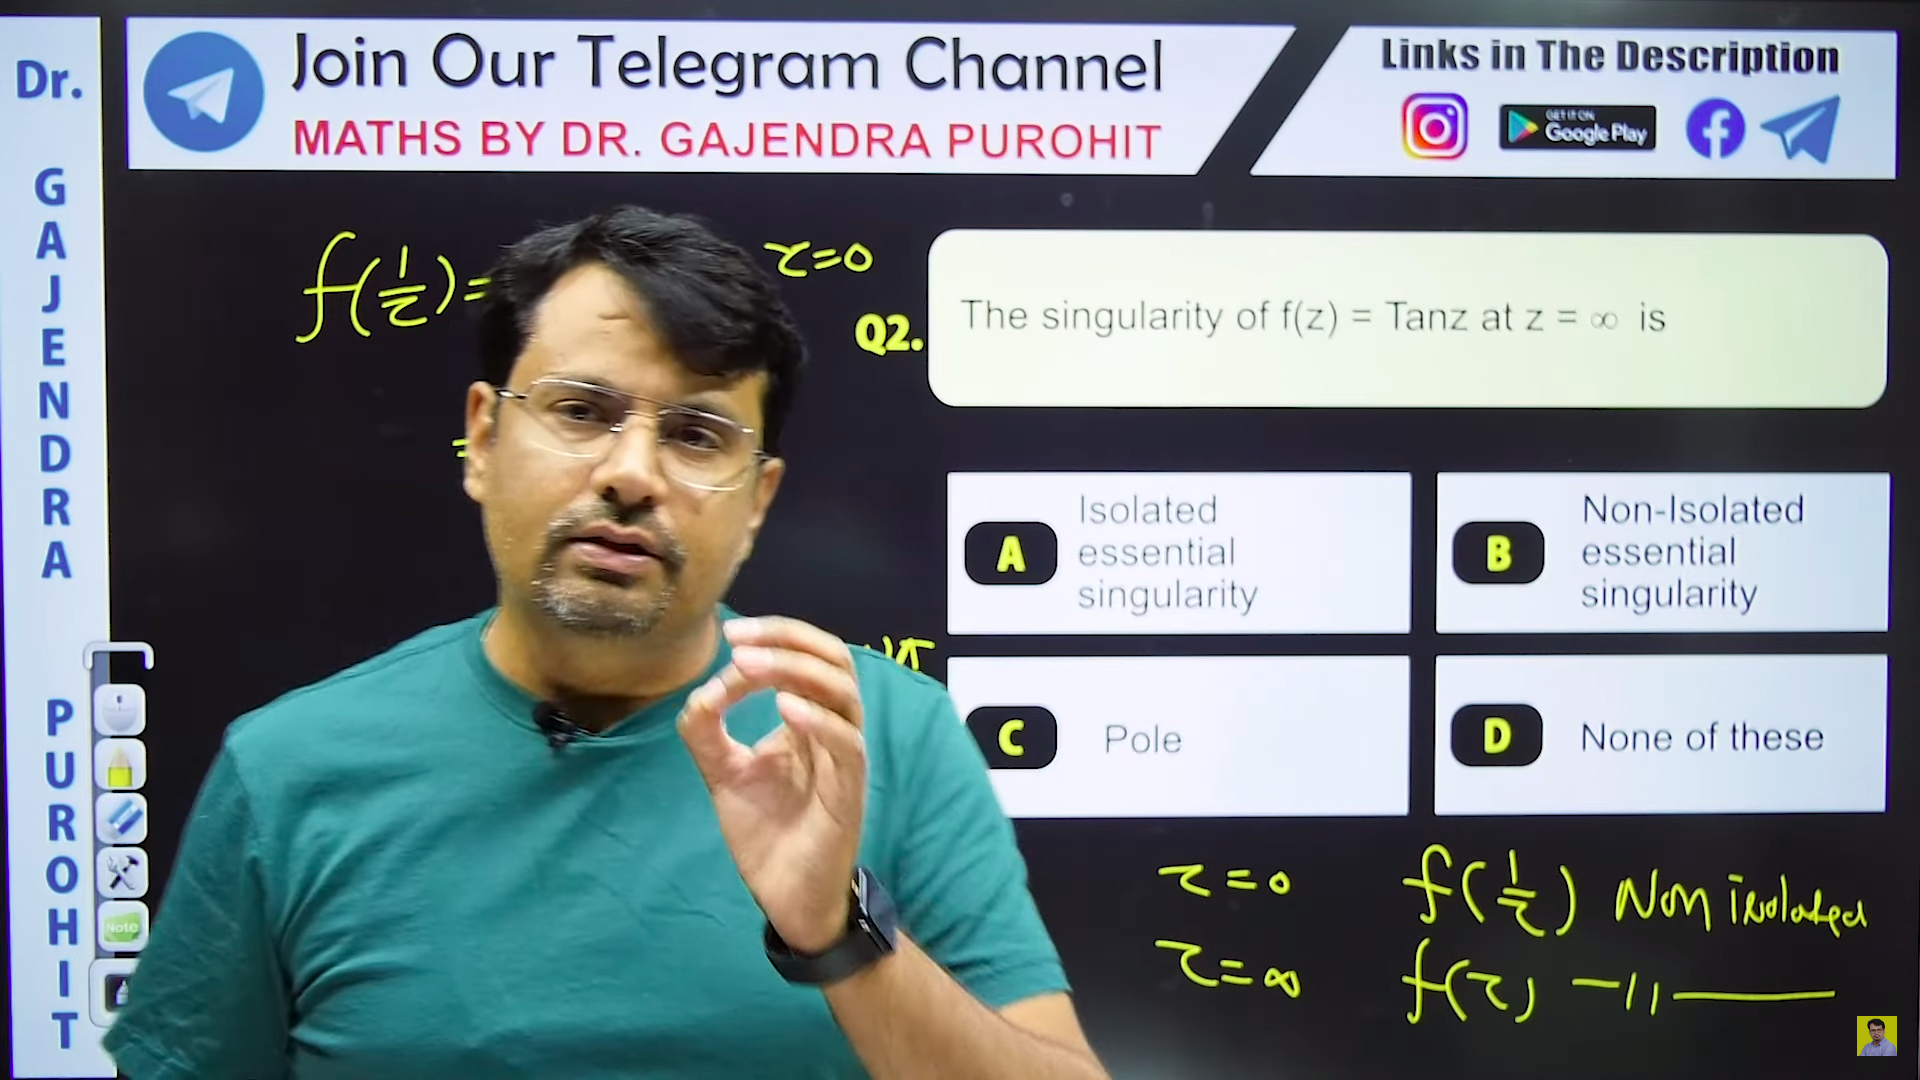

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.9782984 0.9982053]]
1
Person is wearing mask


In [ ]:
input_image_path = input('Path of the image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image ,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled , [1,128,128,3]
                                  )

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('Person is wearing mask')
else:
  print('Person is not wearing mask')